# Liver Disease Classification - Exploratory Data Analysis (EDA)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
df = pd.read_csv("project-data.csv", sep=';')
if df.shape[1] == 1:
    df = df.iloc[:,0].str.split(";", expand=True)
    df.columns = ['category','age','sex','albumin','alkaline_phosphatase','alanine_aminotransferase',
                  'aspartate_aminotransferase','bilirubin','cholinesterase','cholesterol','creatinina',
                  'gamma_glutamyl_transferase','protein']

In [3]:
# Clean column values
df.columns = df.columns.str.strip()
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)


In [4]:
# Encode sex safely: male=1, female=0, unknown=-1
df['sex'] = (
    df['sex']
    .astype(str)
    .str.lower()
    .map({'m': 1, 'male': 1, 'f': 0, 'female': 0})
    .fillna(-1)
    .astype('int64')
)


In [5]:
# Convert numeric columns
for c in df.columns:
    if c != 'category':
        df[c] = pd.to_numeric(df[c], errors='coerce')
        

In [6]:
df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [7]:
# Basic Information
print("Shape:", df.shape)

Shape: (615, 13)


In [8]:
print("Data types:\n", df.dtypes)

Data types:
 category                       object
age                             int64
sex                             int64
albumin                       float64
alkaline_phosphatase          float64
alanine_aminotransferase      float64
aspartate_aminotransferase    float64
bilirubin                     float64
cholinesterase                float64
cholesterol                   float64
creatinina                    float64
gamma_glutamyl_transferase    float64
protein                       float64
dtype: object


In [9]:
print("Missing values per column:\n", df.isna().sum())

Missing values per column:
 category                       0
age                            0
sex                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        1
dtype: int64


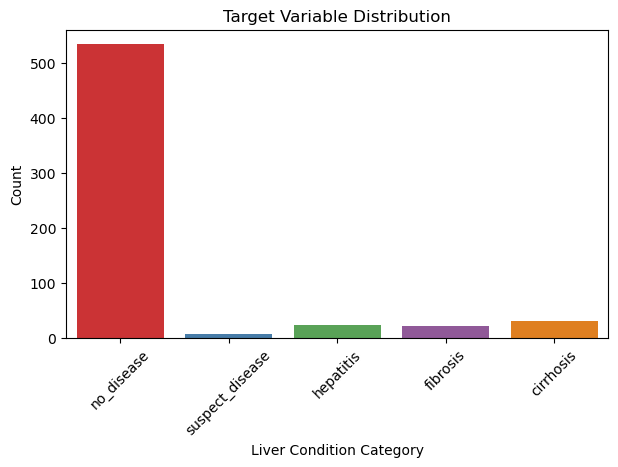

category
no_disease         533
cirrhosis           30
hepatitis           24
fibrosis            21
suspect_disease      7
Name: count, dtype: int64

In [10]:
# Target variable distribution
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='category', hue='category', palette='Set1', legend=False)
plt.title("Target Variable Distribution")
plt.xlabel("Liver Condition Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

df['category'].value_counts()

In [11]:
# Descriptive Statistics for Numeric Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
sex,615.0,0.613008,0.487458,0.00,0.000,1.00,1.000,1.00
albumin,614.0,41.620195,5.780629,14.90,38.800,41.95,45.200,82.20
alkaline_phosphatase,597.0,68.283920,26.028315,11.30,52.500,66.20,80.100,416.60
alanine_aminotransferase,614.0,28.450814,25.469689,0.90,16.400,23.00,33.075,325.30
aspartate_aminotransferase,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
bilirubin,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
cholinesterase,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
cholesterol,605.0,5.368099,1.132728,1.43,4.610,5.30,6.060,9.67
creatinina,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10


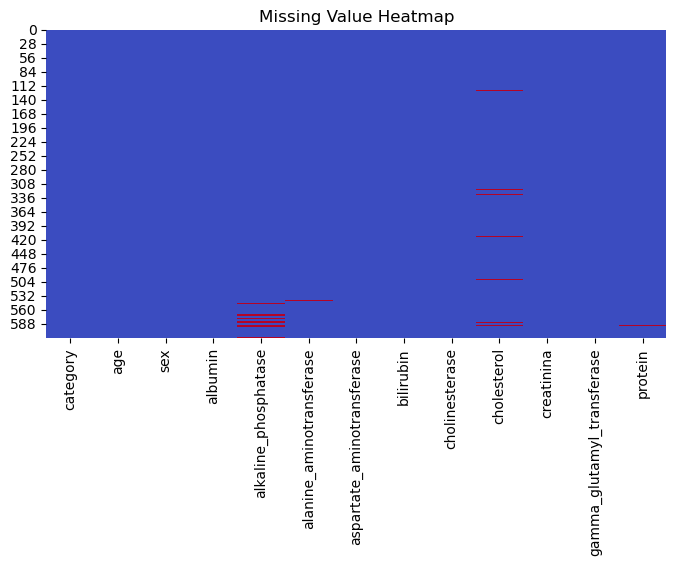

In [12]:
# Missing Value Visualization
plt.figure(figsize=(8,4))
sns.heatmap(df.isna(), cbar=False, cmap='coolwarm')
plt.title("Missing Value Heatmap")
plt.show()

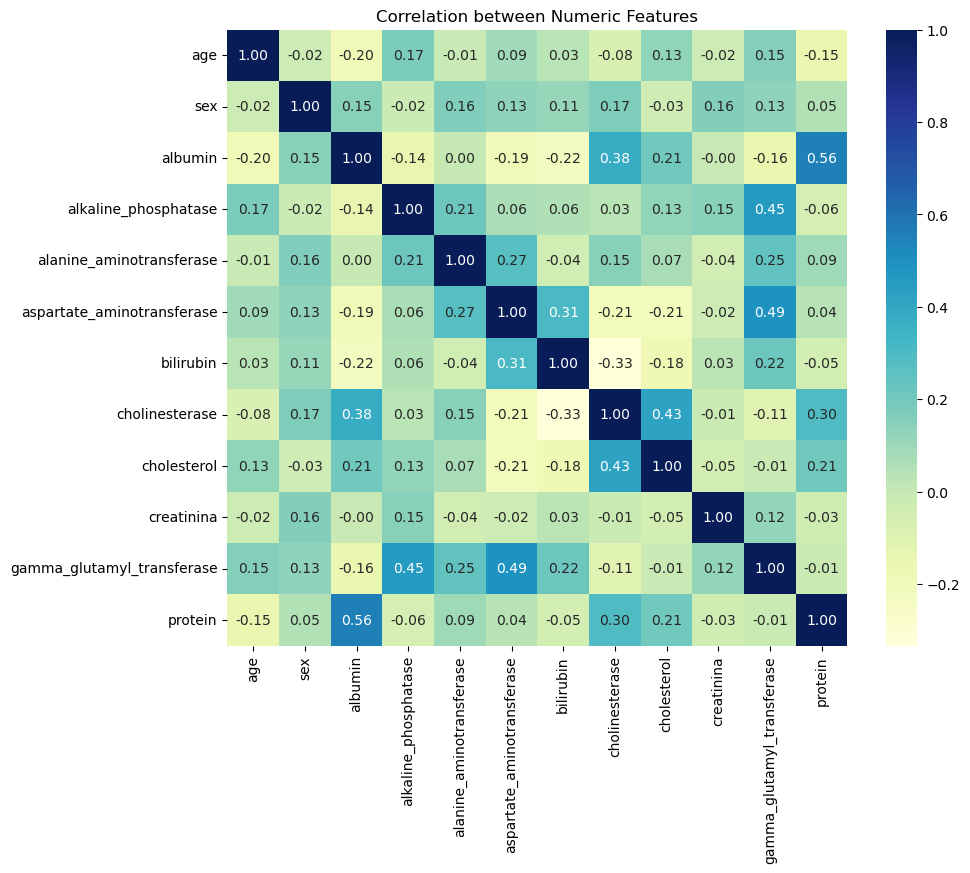

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation between Numeric Features")
plt.show()

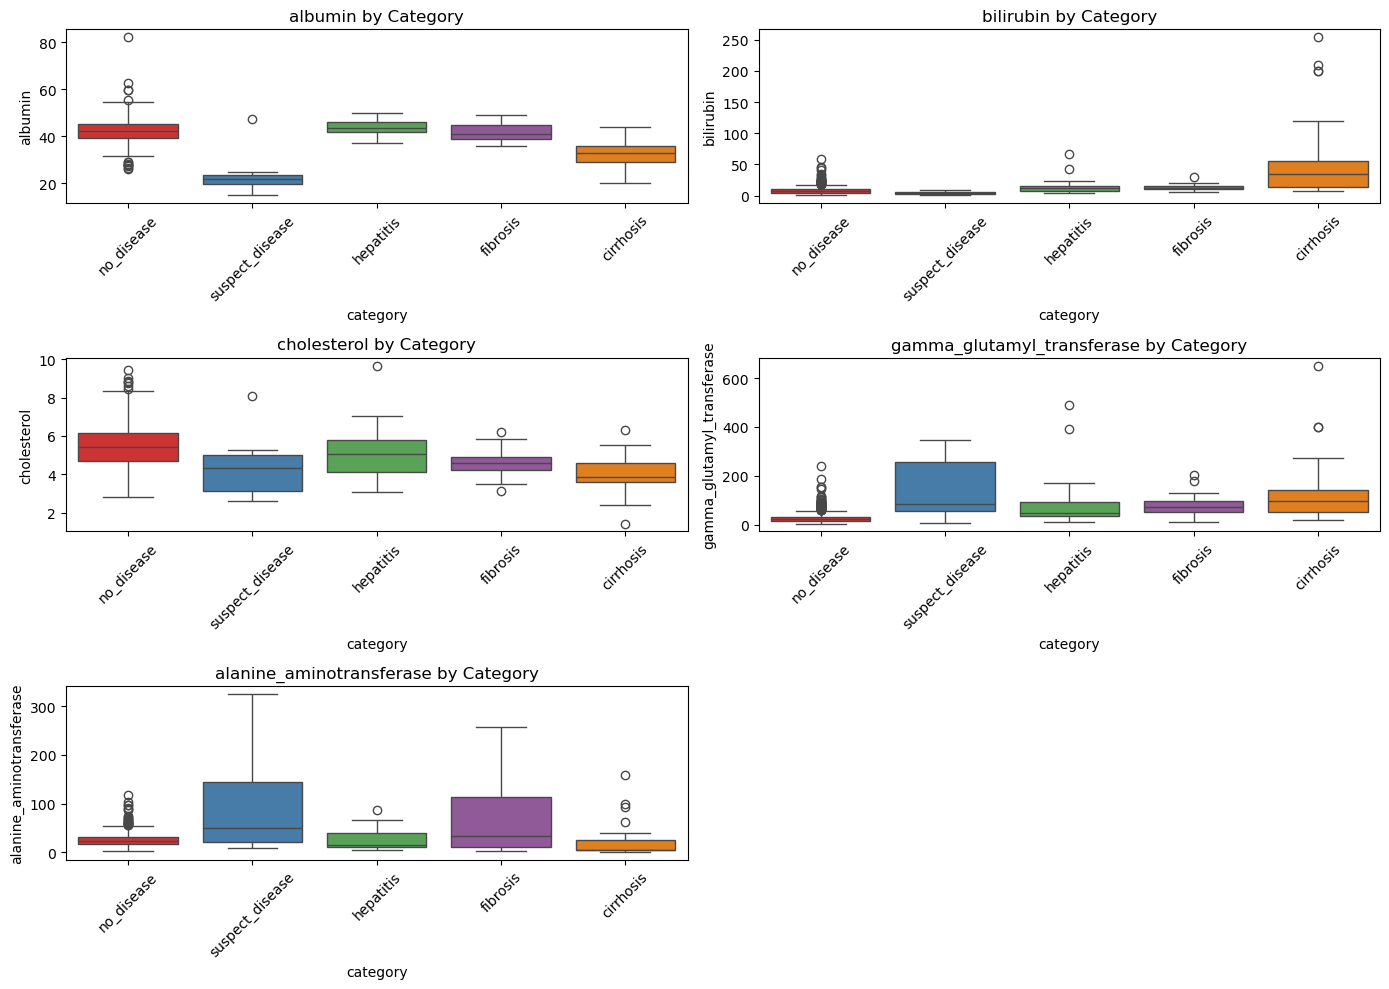

In [14]:
# Boxplots of Key Features by Category
numeric_cols = ['albumin','bilirubin','cholesterol','gamma_glutamyl_transferase','alanine_aminotransferase']
plt.figure(figsize=(14,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x='category', y=col,hue='category', palette='Set1', legend=False)
    plt.title(f"{col} by Category")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The columns you are interested in
numeric_cols = ['albumin', 'bilirubin', 'cholesterol', 'gamma_glutamyl_transferase']

# Create a copy of the original DataFrame to work with
df_cleaned_single_pass = df.copy()

# Initialize a mask that assumes all rows are NOT outliers initially (True)
# This will be updated to False for any row that is an outlier in ANY of the columns
is_non_outlier_overall = pd.Series([True] * len(df_cleaned_single_pass), index=df_cleaned_single_pass.index)

print(f"Original Data Shape: {df.shape}")

# --- Apply Group-wise Filtering for ALL columns in a single pass ---
for col in numeric_cols:
    # Calculate the IQR bounds (Q1 - 1.5*IQR and Q3 + 1.5*IQR) for the current column
    # inside each 'category' group.
    
    # The transform function returns a boolean Series indicating if the value is within the bounds.
    is_not_outlier_col = df_cleaned_single_pass.groupby('category')[col].transform(
        lambda x: (x >= (x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))) & 
                  (x <= (x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))))
    )
    
    # Update the overall mask: a row is kept only if it was already kept (True) 
    # AND is not an outlier in the current column (True)
    is_non_outlier_overall = is_non_outlier_overall & is_not_outlier_col
    
# Filter the DataFrame using the final combined mask
df_cleaned_single_pass = df_cleaned_single_pass[is_non_outlier_overall]

print(f"Cleaned Data Shape (Single Pass Filter): {df_cleaned_single_pass.shape}")
print(f"Rows Removed: {df.shape[0] - df_cleaned_single_pass.shape[0]}")

Original Data Shape: (615, 13)
Cleaned Data Shape (Single Pass Filter): (486, 13)
Rows Removed: 129


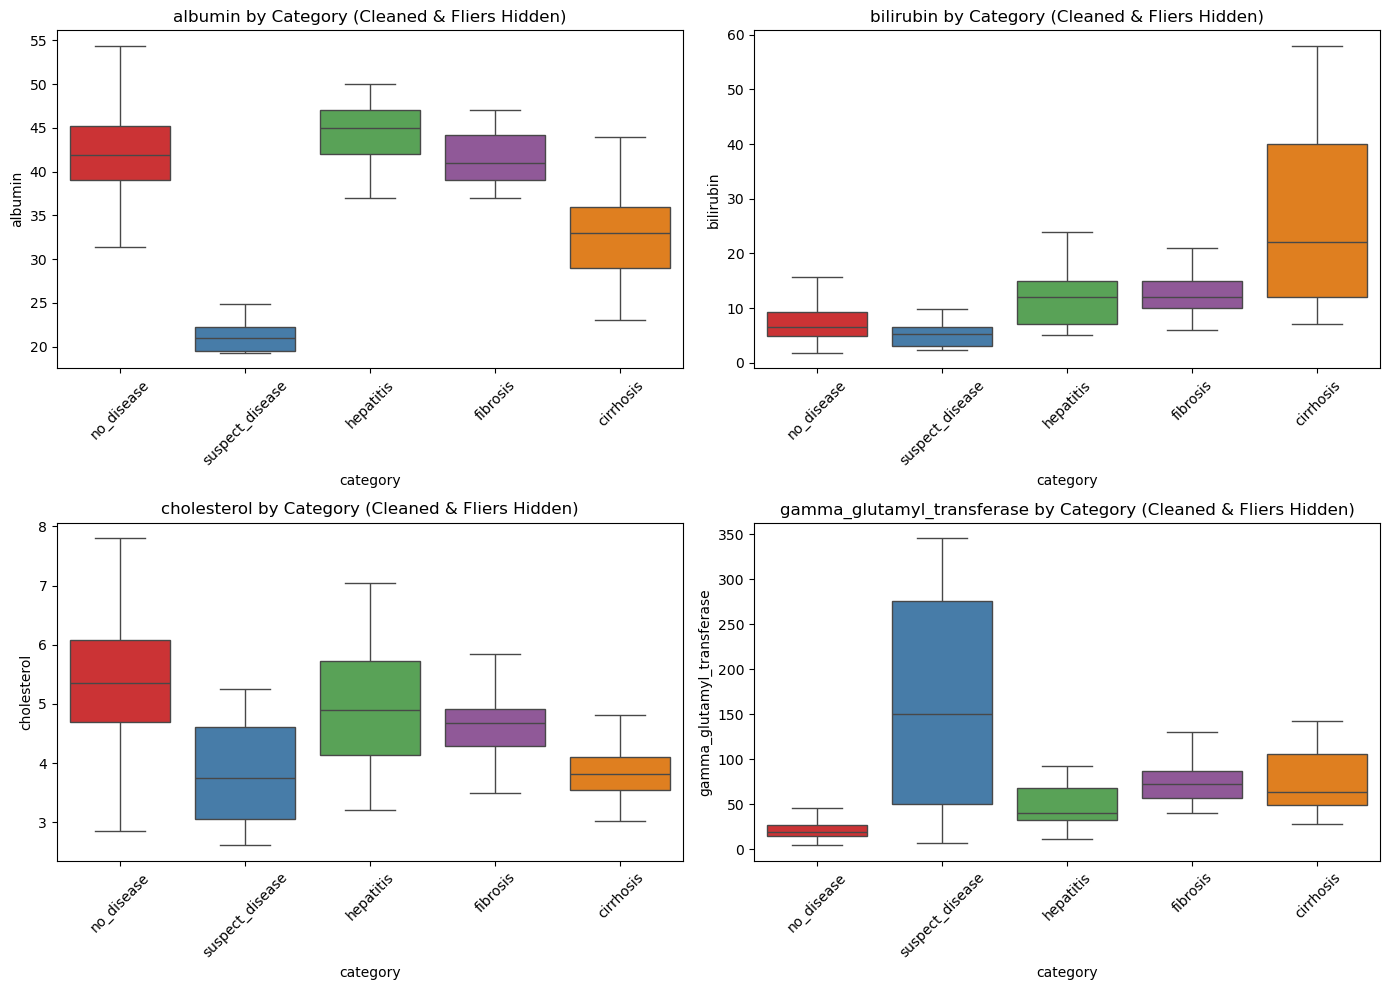

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your list of columns, confirmed from the images
numeric_cols = ['albumin', 'bilirubin', 'cholesterol', 'gamma_glutamyl_transferase'] 

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols):
    # Adjust subplot count if necessary. Based on your images, you have 2 rows and 2 columns (4 plots).
    plt.subplot(2, 2, i + 1) 
    
    # Use the cleaned DataFrame and ADD showfliers=False
    sns.boxplot(data=df_cleaned_single_pass, 
                x='category', 
                y=col, 
                hue='category', 
                palette='Set1', 
                legend=False,
                showfliers=False) # <-- This is the key change
    
    plt.title(f"{col} by Category (Cleaned & Fliers Hidden)")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

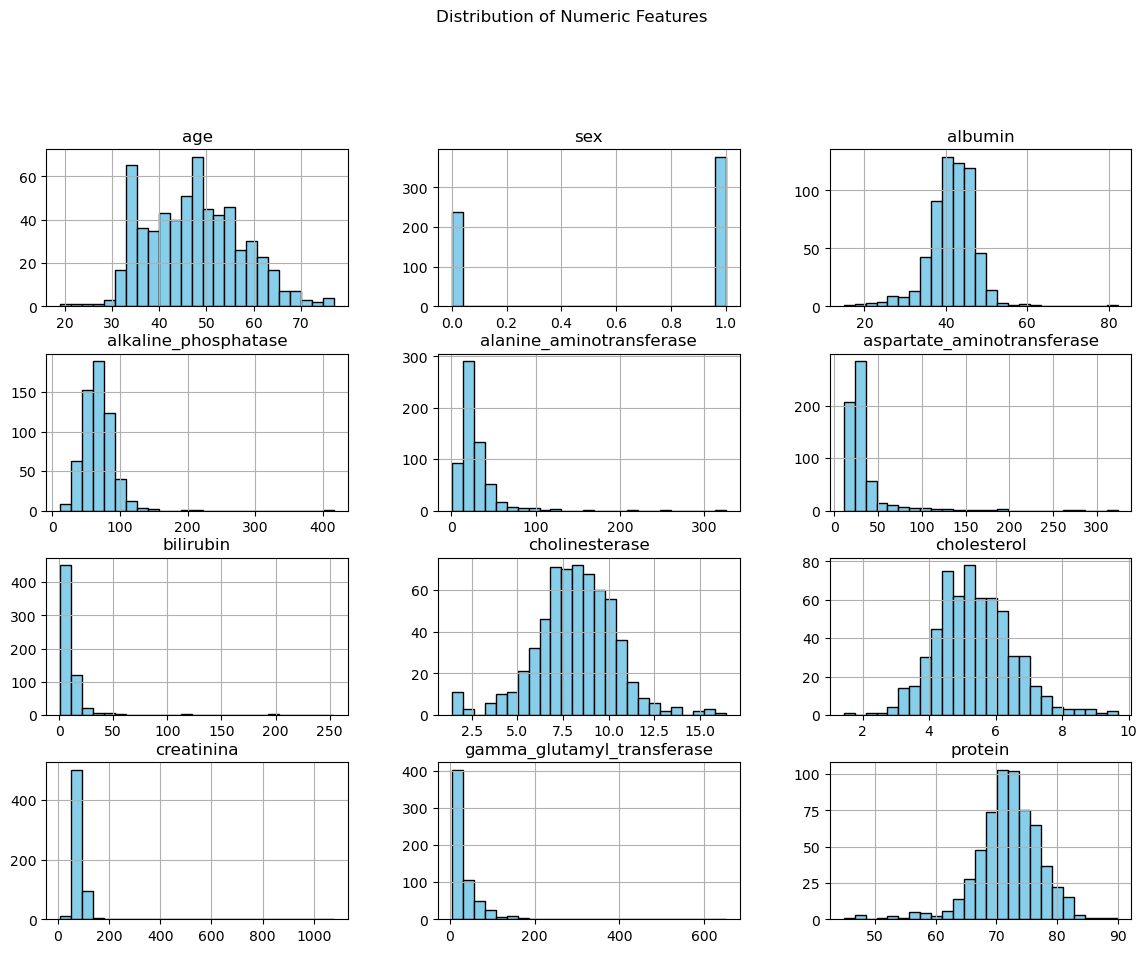

In [17]:
# Histograms of Numeric Features
df.hist(figsize=(14,10), bins=25, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.show()

# Summary and Insights

The dataset contains **615 patient records** and **13 medical attributes** including demographic and biochemical measurements.  
The target variable, **category**, divides patients into five conditions: *no_disease*, *suspect_disease*, *hepatitis*, *fibrosis*, and *cirrhosis*.

From the analysis:
- The majority of cases belong to **no_disease**, showing a clear class imbalance.
- Features such as **bilirubin, ALT (alanine_aminotransferase), AST (aspartate_aminotransferase), and GGT** display significant variation between disease categories, suggesting diagnostic importance.
- A small number of missing values exist in features like *albumin*, *alkaline_phosphatase*, and *cholesterol*, which can be handled using median imputation.
- Most features are continuous and roughly normally distributed after scaling.

Overall, the dataset appears clean and dependable, with minor issues related to class distribution.  


In [18]:
##Step 6: Encode Target + Handle Missing Values + Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])
print("Label Encoding Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Handle missing values (numeric median fill)
df = df.fillna(df.median(numeric_only=True))

# Split features and target
X = df.drop(columns=['category', 'category_encoded'])
y = df['category_encoded']

# Train-Test Split (Stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Label Encoding Mapping: {'cirrhosis': np.int64(0), 'fibrosis': np.int64(1), 'hepatitis': np.int64(2), 'no_disease': np.int64(3), 'suspect_disease': np.int64(4)}
Train shape: (492, 12)
Test shape: (123, 12)


In [19]:
##Step 7: Scale Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
##Step 8: Train Multiple Models & Compare
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    f1 = f1_score(y_test, preds, average='macro')
    results[name] = f1
    
    print(f"\n================ {name} ================")
    print(classification_report(y_test, preds))
    print("Macro F1 Score:", f1)
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

print("\n\n✅ Model Comparison (Higher = Better F1):\n", results)



================ Logistic Regression ================
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.50      0.25      0.33         4
           2       0.50      0.20      0.29         5
           3       0.96      1.00      0.98       107
           4       0.00      0.00      0.00         1

    accuracy                           0.93       123
   macro avg       0.53      0.46      0.47       123
weighted avg       0.90      0.93      0.91       123

Macro F1 Score: 0.4730894676100156
Confusion Matrix:
 [[  5   1   0   0   0]
 [  1   1   1   1   0]
 [  1   0   1   3   0]
 [  0   0   0 107   0]
 [  0   0   0   1   0]]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



================ Random Forest ================
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.33      0.25      0.29         4
           2       0.50      0.20      0.29         5
           3       0.97      1.00      0.99       107
           4       1.00      1.00      1.00         1

    accuracy                           0.93       123
   macro avg       0.70      0.66      0.67       123
weighted avg       0.92      0.93      0.92       123

Macro F1 Score: 0.6653668911733428
Confusion Matrix:
 [[  5   1   0   0   0]
 [  1   1   1   1   0]
 [  1   1   1   2   0]
 [  0   0   0 107   0]
 [  0   0   0   0   1]]


C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:19:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



================ XGBoost ================
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.00      0.00      0.00         4
           2       0.33      0.20      0.25         5
           3       0.97      1.00      0.99       107
           4       1.00      1.00      1.00         1

    accuracy                           0.93       123
   macro avg       0.60      0.61      0.60       123
weighted avg       0.90      0.93      0.91       123

Macro F1 Score: 0.6010811768876285
Confusion Matrix:
 [[  5   1   0   0   0]
 [  1   0   2   1   0]
 [  1   1   1   2   0]
 [  0   0   0 107   0]
 [  0   0   0   0   1]]

================ SVM ================
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.00      0.00      0.00         4
           2       1.00      0.20      0.33         5
           3       0.94      0.99      0.9

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\anaconda3\Lib\site-packag

In [21]:
import joblib

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print("\nBest Model Selected:", best_model_name)

# Save model + scaler + label encoder
joblib.dump(best_model, "best_model.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(le, "label_encoder.joblib")

print("✅ Model, Scaler & Encoder Saved Successfully.")



Best Model Selected: Random Forest
✅ Model, Scaler & Encoder Saved Successfully.


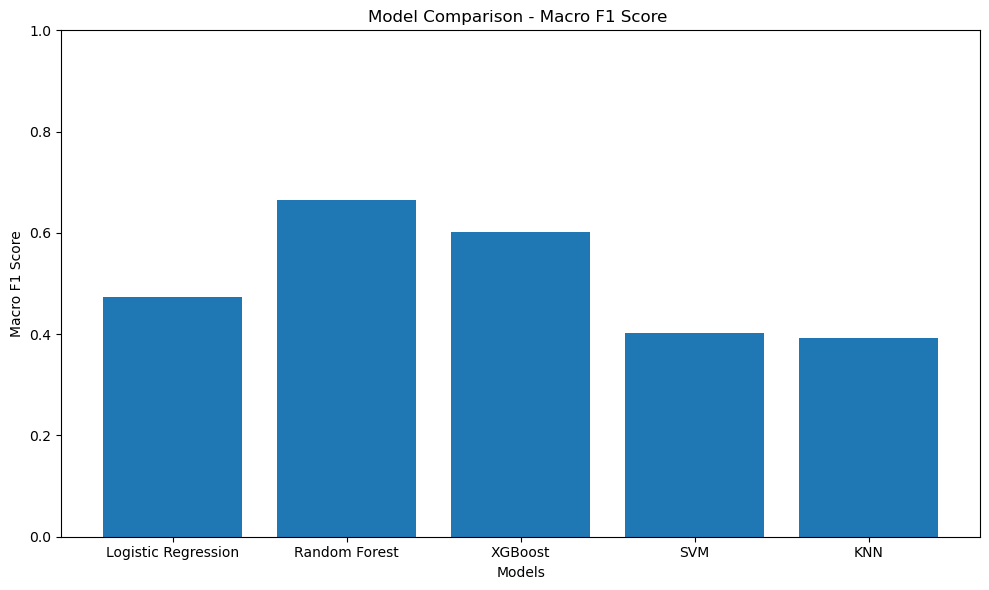

In [22]:
##Step 9: Comparison graph

#using results dictionary
r_models = list(results.keys())
r_scores = list(results.values())

#plotting graph
plt.figure(figsize=(10,6))
plt.bar(r_models,r_scores)

plt.title('Model Comparison - Macro F1 Score ')
plt.xlabel('Models')
plt.ylabel('Macro F1 Score')
plt.ylim(0,1)

plt.tight_layout()
plt.show()

#### Deployment with Streamlit:

In [23]:
import pickle

In [24]:
filename = 'Liver_Disease.sav'
pickle.dump(model,open(filename,'wb'))

In [25]:
loaded_model = pickle.load(open('Liver_Disease.sav','rb'))

In [ ]:
suspect_disease,59,f,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1